In [2]:
# 가중치(weight)의 초깃값을 무엇으로 설정해야 하는가?
# 결론부터 말하면
# 활성화 함수로 sigmoid나 tanh 등 S자 곡선 모양을 사용할 때에는 가중치 초깃값으로 Xavier 초깃값이 좋고,
# ReLU 함수를 활성화 함수로 사용할 때에는 가중치 초깃값으로 Kaiming He의 이름을 딴 [He 초깃값]을 사용하면 좋다.
# He 초깃값은 앞 층의 노드가 n개 일때, 표준편차가 √2/√n인 정규분포를 사용하는 것이다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수를 활성화 함수로 사용할때, 은닉층에서 활성화 함수의 출력값 분포를 보자.

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

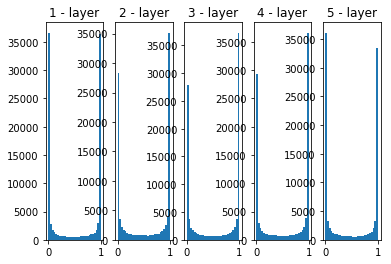

In [7]:
# 가중치를 표준편차가 1인 정규분포로 초기화할 때, 각 층의 활성화 함수의 출력값 분포를 히스토그램으로

x = np.random.randn(1000, 100)
node_num = 100 # 노드 개수
hidden_layer_size = 5 # 은닉층 개수
activations = {} # 활성화 함수의 출력값을 저장할 딕셔너리

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 가중치 초깃값 설정부분
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + " - layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 출력값이 0 또는 1에 치우쳐있다. 그 미분값은 0에 가까워지기 때문에  역전파 때 [기울기 소실(gradient vanishing)]문제가 발생한다.

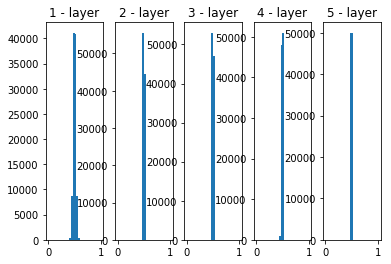

In [8]:
# 가중치를 표준편차가 0.01인 정규분포로 초기화할 때, 각 층의 활성화 함수의 출력값 분포를 히스토그램으로

x = np.random.randn(1000, 100)
node_num = 100 # 노드 개수
hidden_layer_size = 5 # 은닉층 개수
activations = {} # 활성화 함수의 출력값을 저장할 딕셔너리

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 # 가중치 초깃값 설정부분
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + " - layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 0.5 부분에 집중되어서 기울기 소실문제는 없지만, 출력값들이 몰려있어서 [표현력 제한]문제가 있다.
# 다수의 뉴런이 거의 같은 값을 출력하기 때문에, 뉴런을 여러 개 둔 의미가 없다는 것

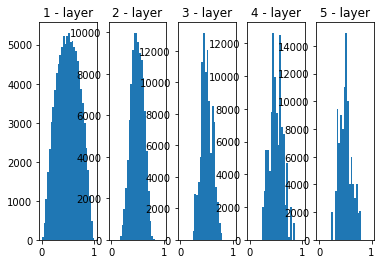

In [9]:
# 가중치를 Xavier 초깃값으로 초기화할 때, 각 층의 활성화 함수의 출력값 분포를 히스토그램으로
# Xavier 초깃값 : 앞 층의 노드 수가 n개면, 초깃값의 표준편차가 1/√n인 분포로 설정하는 것

x = np.random.randn(1000, 100)
node_num = 100 # 노드 개수
hidden_layer_size = 5 # 은닉층 개수
activations = {} # 활성화 함수의 출력값을 저장할 딕셔너리

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # 가중치 초깃값 설정부분
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + " - layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 적당히 퍼져 있어서 학습이 잘 이루어 질 것이다.